In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/Japan/energy-japan.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='JPN']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='JPN']
JPN_table = pd.merge(gdp_table, pop_table, on=['Year'])
JPN_table = pd.merge(JPN_table, energy_table, on=['Year'])

In [19]:
pop = JPN_table['Total population (Gapminder, HYDE & UN)']
gdp = JPN_table['GDP per capita']*pop
energy = JPN_table['Energy (TWh)']
year = JPN_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

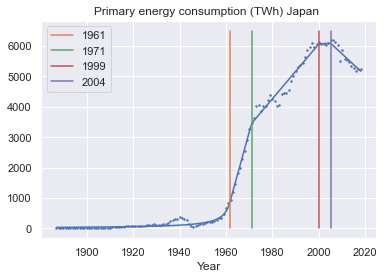

In [20]:
plt.scatter(year, energy, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (TWh) Japan ')
b,c,d,f,h,k,x1,x2, x3, x4 = 2000, 1964, 250, 95, 0.001, -100, 1961, 1973, 1998, 2008
b,c,d,f,h,k,x1,x2, x3, x4 =reg.hypLLLL(year, energy, p0=(b,c,d,f,h,k,x1,x2, x3, x4), bounds = [-200,3000])
plt.plot(yplot, reg.hypllll(yplot,b,c,d,f,h,k,x1,x2, x3, x4 ))
plt.plot([x1, x1], [0, 6500], label=str(int(x1)))
plt.plot([x2, x2], [0, 6500], label=str(int(x2)))
plt.plot([x3, x3], [0, 6500], label=str(int(x3)))
plt.plot([x4, x4], [0, 6500], label=str(int(x4)))
plt.legend()
ypred = reg.hypllll(year,b,c,d,f,h,k,x1,x2, x3, x4 )*3.6
JPN_table['Energy(PJ)-Time(Year)'] = ypred
JPN_table['Primary energy (PJ)'] = energy*3.6

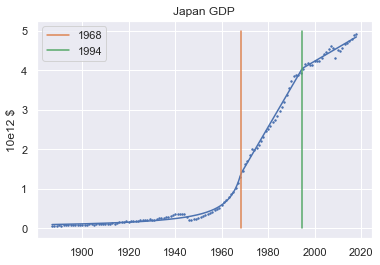

In [21]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Japan GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 5], label=str(int(x1)))
plt.plot([x2, x2], [0, 5], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')
ypred = reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )*(10**12)
JPN_table['GDP(2011$)-Time(year)'] = ypred

(0.21427716256631998, 0.0005710340673, 9.999725341796875, -0.00018073233739105196, 0.002788123358568048, 0.0023072950040770746)


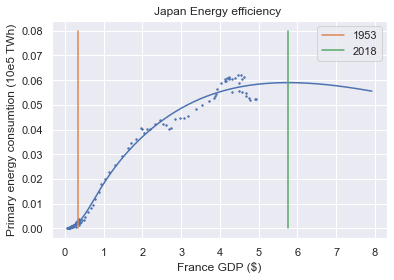

In [22]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max()+3, 200)
plt.scatter(g,e, s= 2)
plt.xlabel('France GDP ($)')
plt.ylabel('Primary energy consumtion (10e5 TWh)')
plt.title('Japan Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-20,20])
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-G_i) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([G_i, G_i],[0.0, 0.08], label = str(year_infl))

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.08], label = str(year_max)) 
plt.legend()
ypred = reg.s_model(g,G_i, E_i, A, a1, a2, a3 )*3.6*(10**5)
JPN_table['Energy(PJ)-GDP(10e12$)'] = ypred


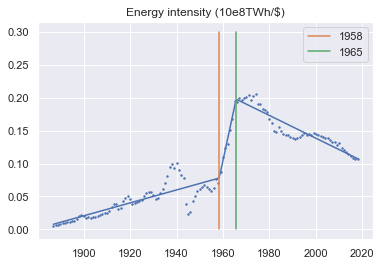

In [23]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -2*10, -1.5*10, 1850, 1925, 1980
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))

plt.plot([x2, x2], [0, 0.3], label=str(int(x2)))
plt.plot([x3, x3], [0, 0.3], label=str(int(x3)))
plt.legend()
plt.title('Energy intensity (10e8TWh/$)')
ypred = reg.llll(year,a,b, c, e, g, x1, x2, x3 )*(10**8)*3.6
JPN_table['EI(PJ/$)-Time(year)'] = ypred

Text(0.5, 1.0, 'Variation in (%), Japan')

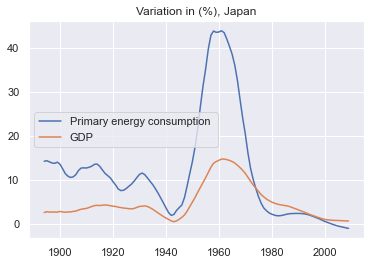

In [24]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Japan")


In [25]:
JPN_table

,Year,GDP per capita,Entity,Code,"Total population (Gapminder, HYDE & UN)",Energy (TWh),Energy(PJ)-Time(Year),Primary energy (PJ),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year)
0,1887,1847.53,Japan,JPN,39067036,4.213685,122.300482,15.169264,9.798667e+10,93.264632,2.825450e+06
1,1888,1723.57,Japan,JPN,39394500,4.402121,123.894734,15.847637,9.912020e+10,90.924271,3.179052e+06
2,1889,1754.53,Japan,JPN,39721712,4.849110,125.531098,17.456795,1.002803e+11,91.878696,3.532654e+06
3,1890,1853.58,Japan,JPN,40053760,5.979461,127.211267,21.526059,1.014678e+11,94.473749,3.886256e+06
4,1891,1749.74,Japan,JPN,40397840,6.481298,128.937022,23.332674,1.026838e+11,92.423539,4.239857e+06
...,...,...,...,...,...,...,...,...,...,...,...
127,2014,36537.00,Japan,JPN,128169000,5344.636000,19628.050519,19240.689600,4.707777e+12,20782.090449,4.109527e+07
128,2015,37031.00,Japan,JPN,127985000,5268.915000,19373.406500,18968.094000,4.741996e+12,20832.057668,4.047337e+07
129,2016,37465.00,Japan,JPN,127763000,5179.953000,19118.762481,18647.830800,4.776215e+12,20871.383193,3.985147e+07
130,2017,38414.86,Japan,JPN,127503000,5247.426000,18864.118462,18890.733600,4.810433e+12,20955.528867,3.922957e+07


In [26]:
JPN_table =JPN_table.rename(columns={ 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })

In [29]:
JPN_table.to_csv('../BDD/final_tables/JPN.csv', index=False)